## Task 19: Statistical plotting with Seaborn (regression plots, distribution plots)
Submitted by: Awais Anwer

In [1]:
# Linear Regression Plot (sns.regplot)
# Multiple Linear Regression Plot (sns.lmplot)
# Residual Plot (sns.residplot)

# Histogram (sns.histplot)
# Kernel Density Estimate (KDE) Plot (sns.kdeplot)
# Distribution Plot (sns.distplot)
# Box Plot (sns.boxplot)
# Violin Plot (sns.violinplot)
# Pair Plot (sns.pairplot)

# Heatmap (sns.heatmap)
# Joint Plot (sns.jointplot)
# Facet Grid (sns.FacetGrid)

In [35]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Linear Regression Plot (sns.regplot)

In [4]:
# Linear Regression Plot (sns.regplot)
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


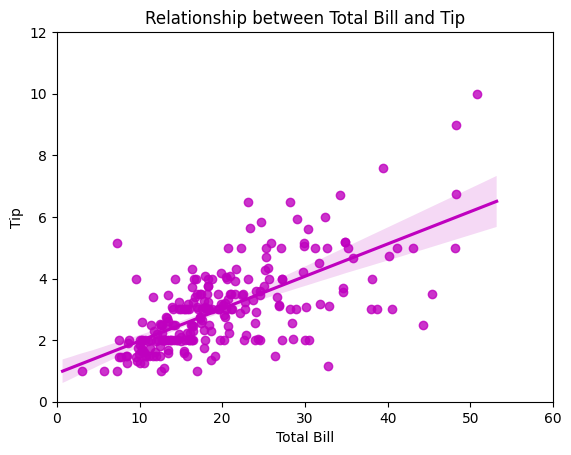

In [21]:
sns.regplot(x="total_bill", y="tip", data=tips,
            truncate=False, scatter_kws={'color': 'm'}, line_kws={'color': 'm'})

plt.xlim(0, 60)
plt.ylim(0, 12)

plt.title("Relationship between Total Bill and Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")

plt.show()

### Multiple Linear Regression Plot (sns.lmplot)

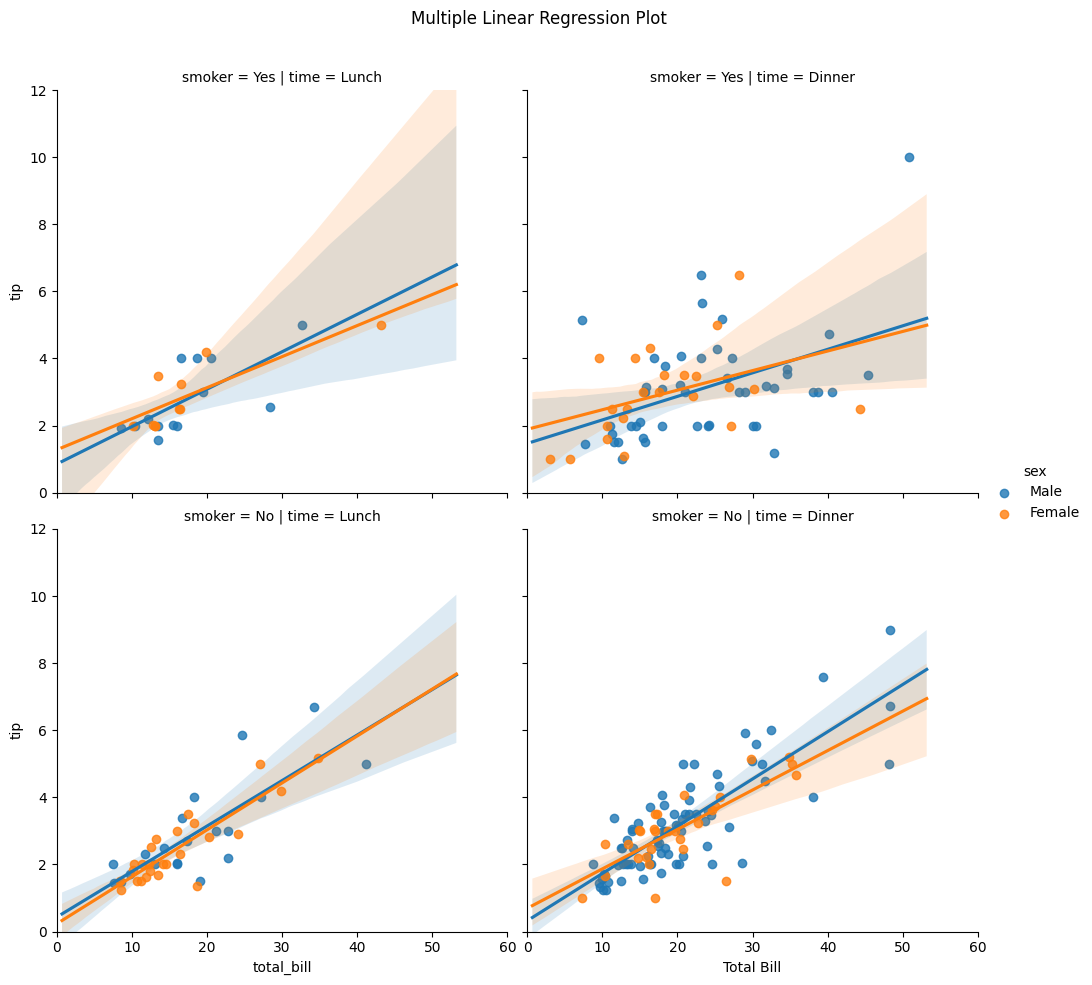

In [22]:
# Multiple Linear Regression Plot (sns.lmplot)

sns.lmplot(x="total_bill", y="tip", hue="sex", col="time", row="smoker",
           data=tips, truncate=False, height=5, aspect=1)

plt.xlim(0, 60)
plt.ylim(0, 12)

plt.suptitle("Multiple Linear Regression Plot")
plt.subplots_adjust(top=0.9)
plt.xlabel("Total Bill")
plt.ylabel("Tip")

plt.show()

### Residual Plot (sns.residplot)

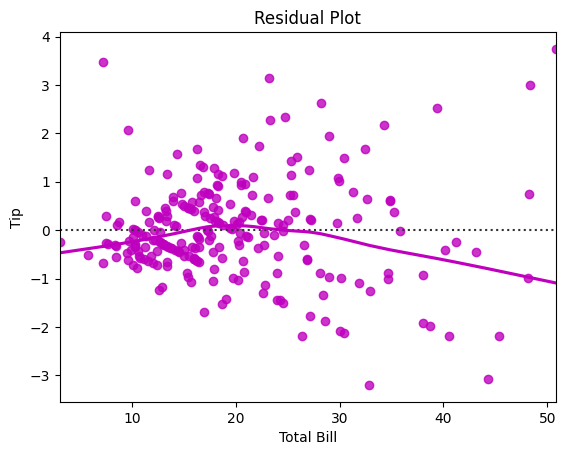

In [29]:
# Create a residual plot
sns.residplot(x="total_bill", y="tip", lowess=True, data=tips, color="m")

# Set the title and labels
plt.title("Residual Plot")
plt.xlabel("Total Bill")
plt.ylabel("Tip")

# Show the plot
plt.show()

### Histogram

In [32]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [33]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [40]:
diamonds['cut'].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

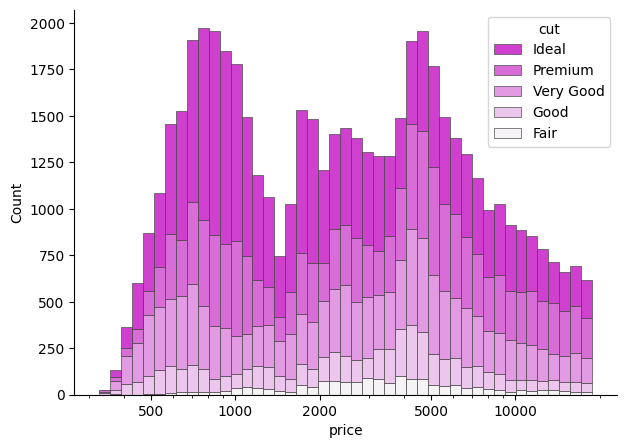

In [43]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    data = diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000]);

### Kernel Density Estimate (KDE) Plot (sns.kdeplot)

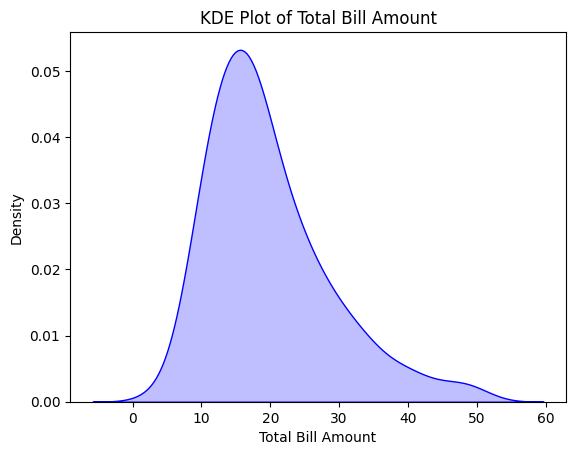

In [61]:
sns.kdeplot(data=tips["total_bill"], fill=True, color="b")

plt.title("KDE Plot of Total Bill Amount")
plt.xlabel("Total Bill Amount")
plt.ylabel("Density")

plt.show()

### Distribution Plot (sns.distplot)

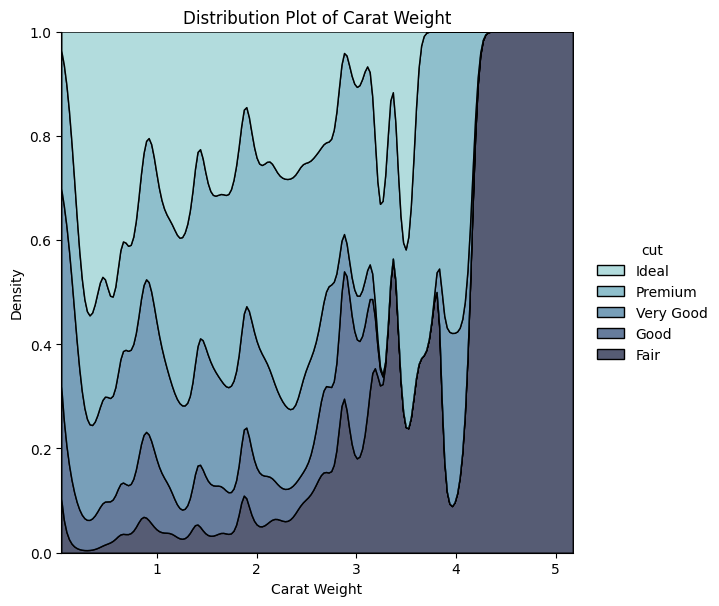

In [77]:
sns.displot(
    data=diamonds,
    x="carat", hue="cut",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)
plt.title("Distribution Plot of Carat Weight")
plt.xlabel("Carat Weight")
plt.ylabel("Density")

plt.show()

### Box Plot (sns.boxplot)

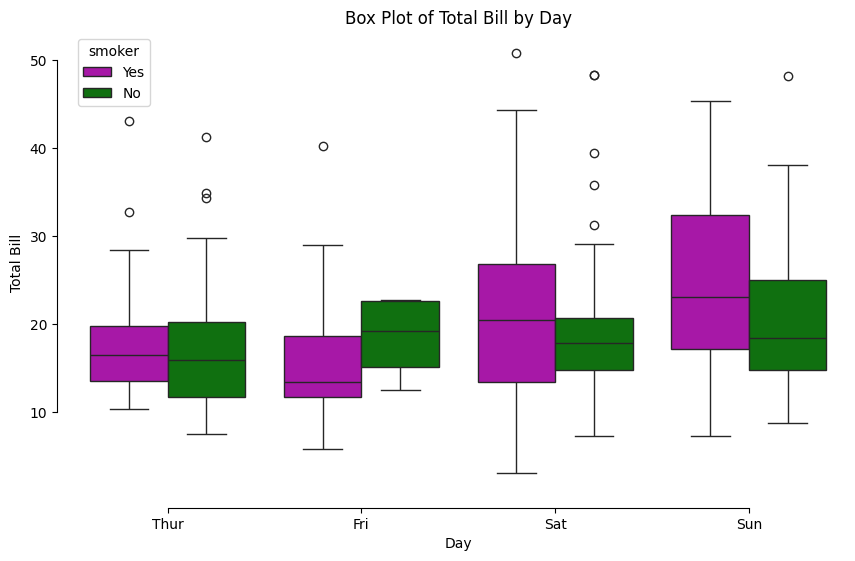

In [70]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)
ax.set(
    xlabel="Day",
    ylabel="Total Bill",
    title="Box Plot of Total Bill by Day"
);

### Violin Plot (sns.violinplot)

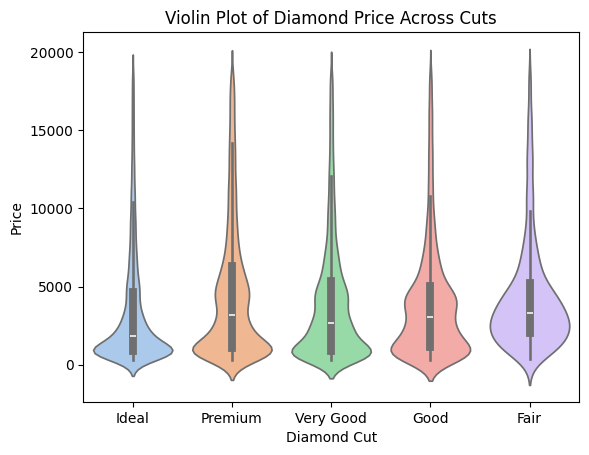

In [81]:
sns.violinplot(x="cut", y="price", hue="cut", data=diamonds, palette="pastel", legend=False)

plt.title("Violin Plot of Diamond Price Across Cuts")
plt.xlabel("Diamond Cut")
plt.ylabel("Price")

plt.show()

### Pair Plot (sns.pairplot)

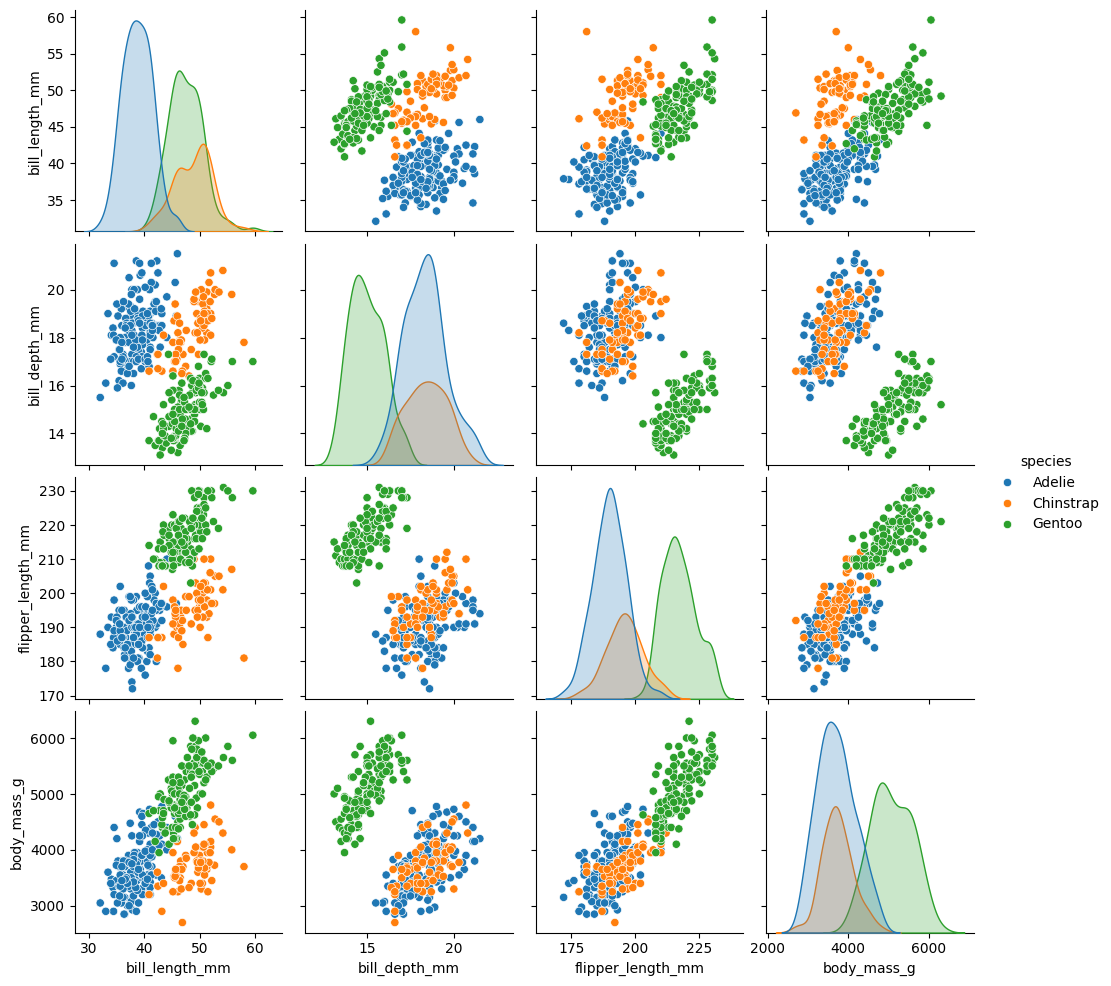

In [84]:
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

### Heatmap (sns.heatmap)

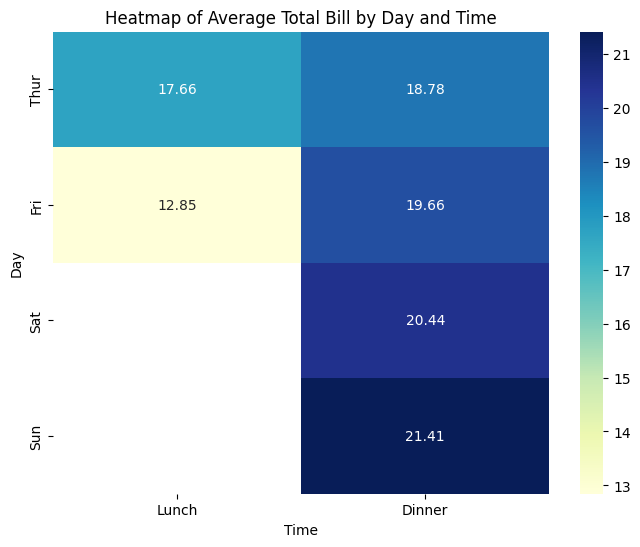

In [87]:
# Pivot the dataset to create a matrix of average total bill per day and time
tips_pivot = tips.pivot_table(values="total_bill", index="day", columns="time", aggfunc="mean")

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(tips_pivot, annot=True, fmt=".2f", cmap="YlGnBu", ax=ax)

ax.set(
    xlabel="Time",
    ylabel="Day",
    title="Heatmap of Average Total Bill by Day and Time"
)

plt.show()

### Joint Plot (sns.jointplot)

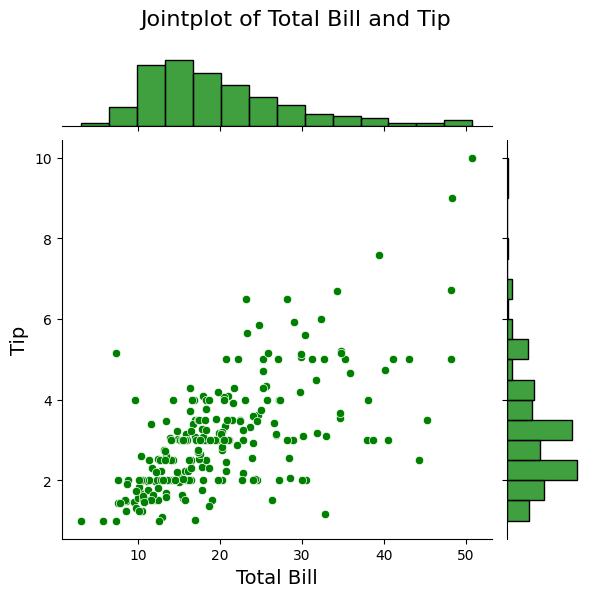

In [93]:
g = sns.jointplot(x="total_bill", y="tip", data=tips, kind="scatter", color="g")

g.fig.suptitle("Jointplot of Total Bill and Tip", fontsize=16)
g.ax_joint.set_xlabel("Total Bill", fontsize=14)
g.ax_joint.set_ylabel("Tip", fontsize=14)

plt.subplots_adjust(top=0.9)
plt.show()

### Facet Grid (sns.FacetGrid)

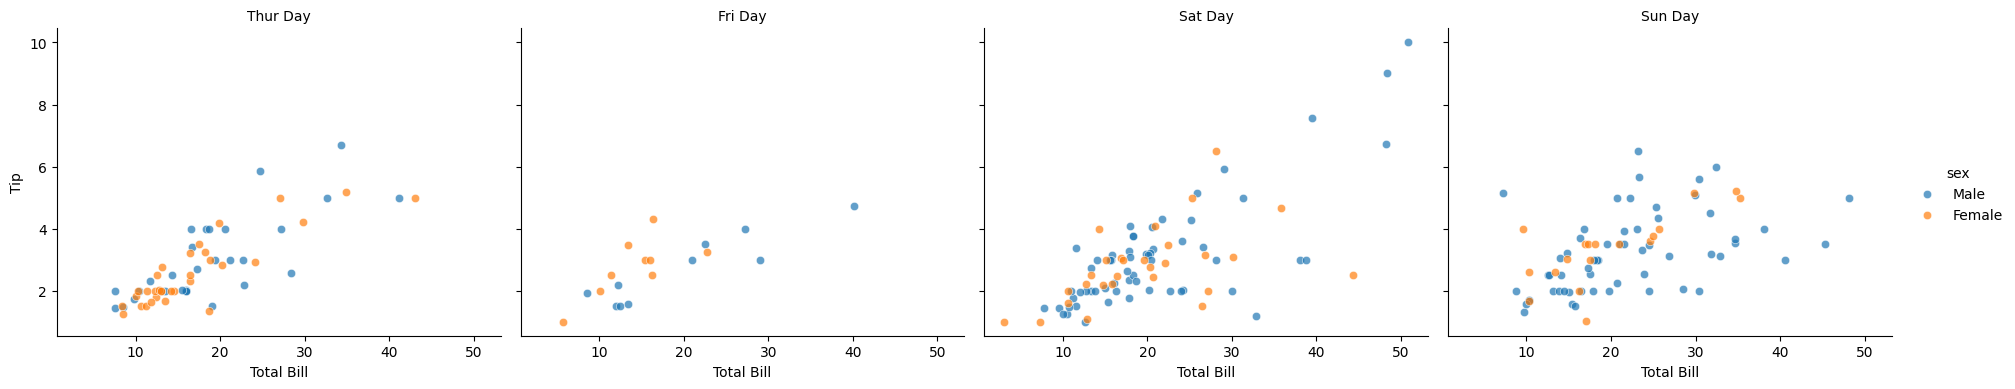

In [96]:
g = sns.FacetGrid(tips, col="day", hue="sex", height=4, aspect=1.2)

g.map(sns.scatterplot, "total_bill", "tip", alpha=0.7)

g.add_legend()
g.set_axis_labels("Total Bill", "Tip")
g.set_titles(col_template="{col_name} Day")

plt.show()